In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn import metrics
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/6.overlap.csv", delimiter=',')


In [5]:
data[:5]

array([[7. , 3.2, 0. ],
       [6.4, 3.2, 0. ],
       [6.9, 3.1, 0. ],
       [5.5, 2.3, 0. ],
       [6.5, 2.8, 0. ]])

In [6]:
def knn_comparison(data,n_neighbors=15):
    
    x = data[:,:2]
    y = data[:,2]
    
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x,y)
    
    x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
    y_min, y_max = x[:,1].min()-1, x[:,1].max()+1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    z = z.reshape(xx.shape)
    
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    
    plt.scatter(x[:,0], x[:,1], c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title('K values = '+str(n_neighbors))
    
    plt.show()

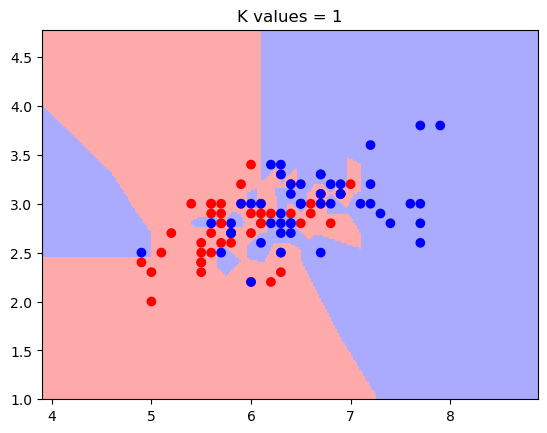

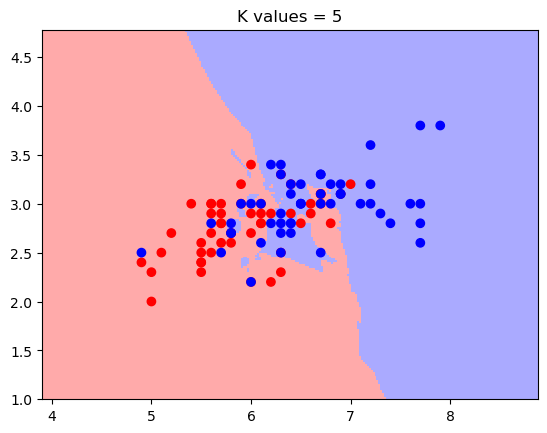

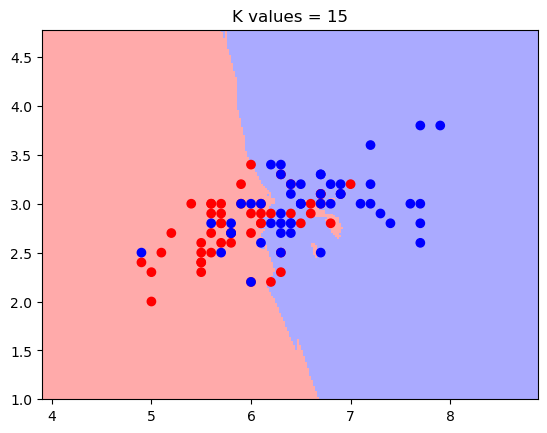

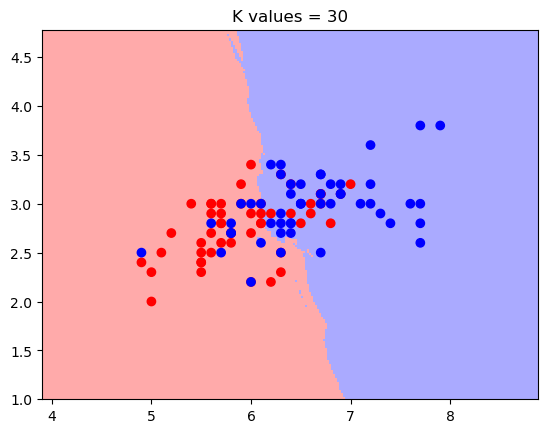

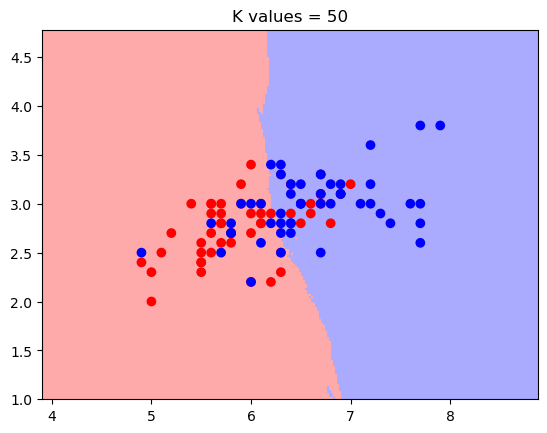

In [10]:
knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)
knn_comparison(data, 30)
knn_comparison(data, 50)

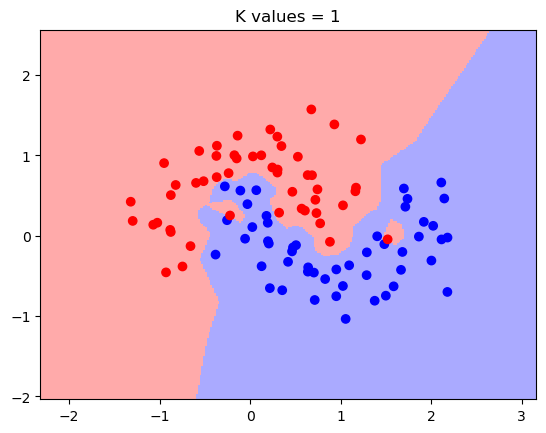

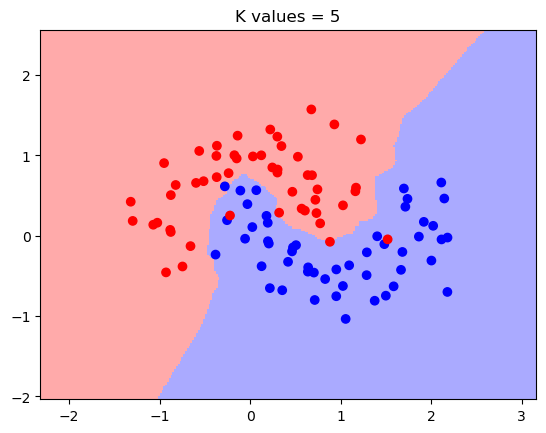

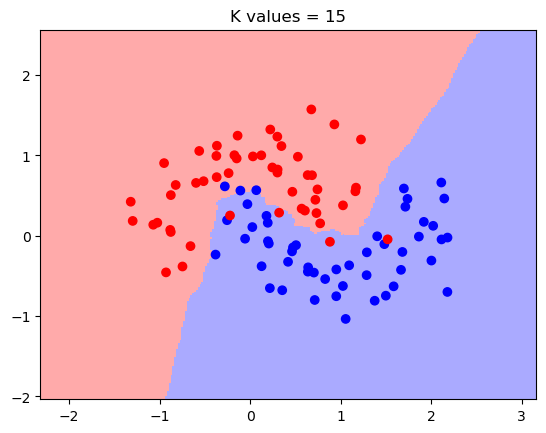

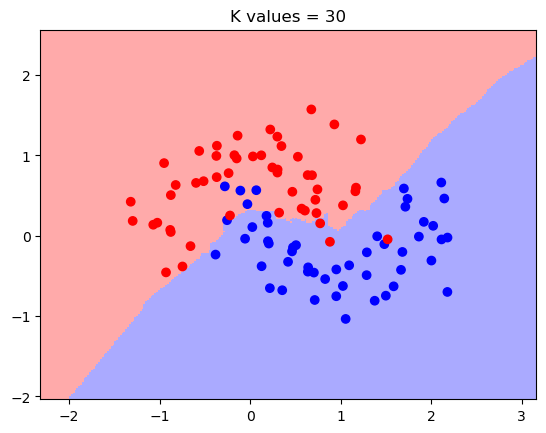

In [11]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/1.ushape.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)
knn_comparison(data, 30)


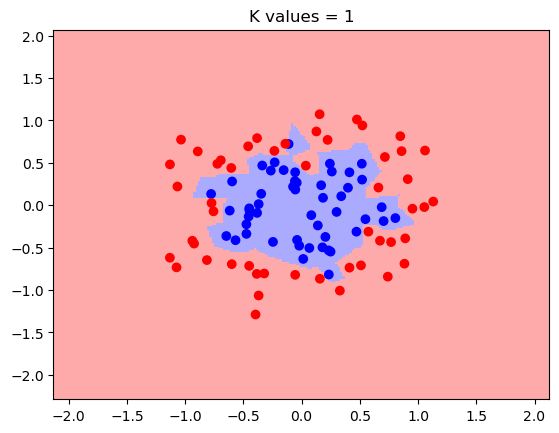

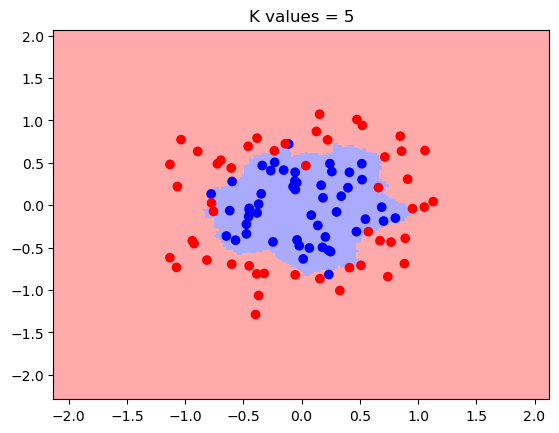

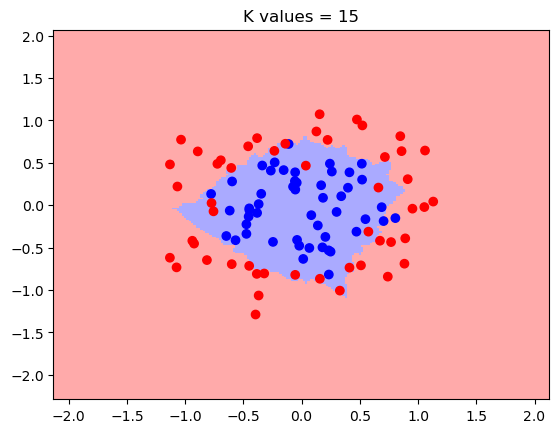

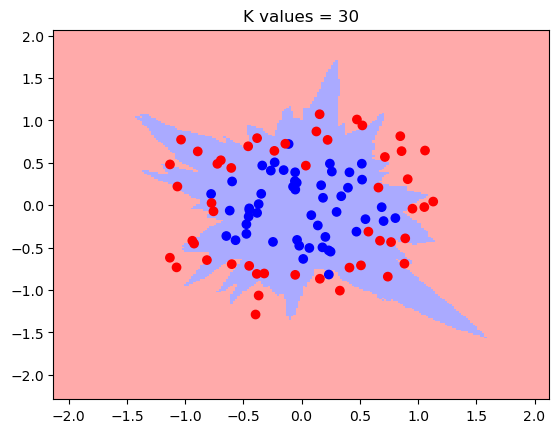

In [12]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/2.concerticcir1.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)
knn_comparison(data, 30)


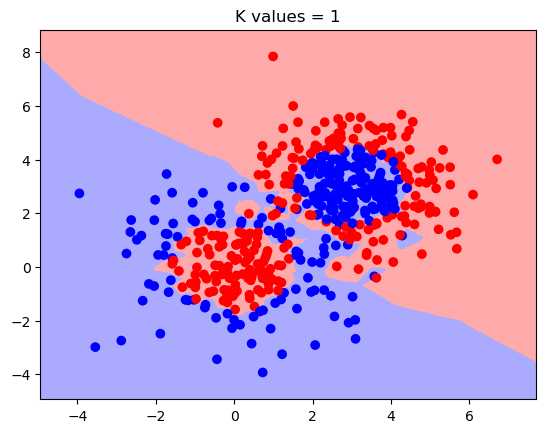

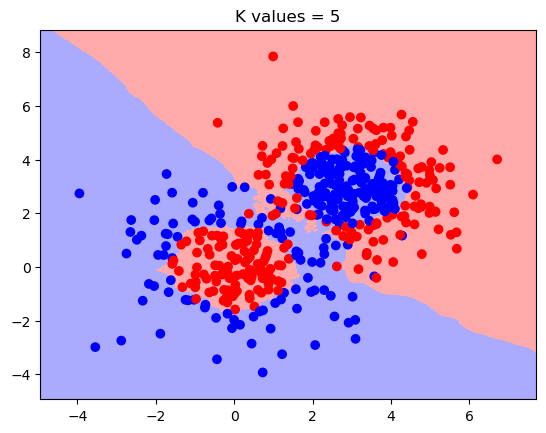

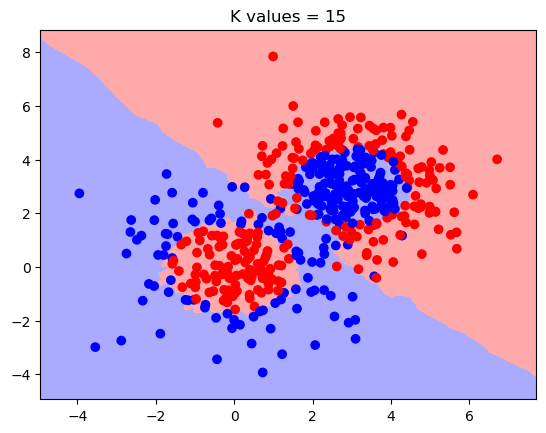

In [13]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/3.concertriccir2.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)


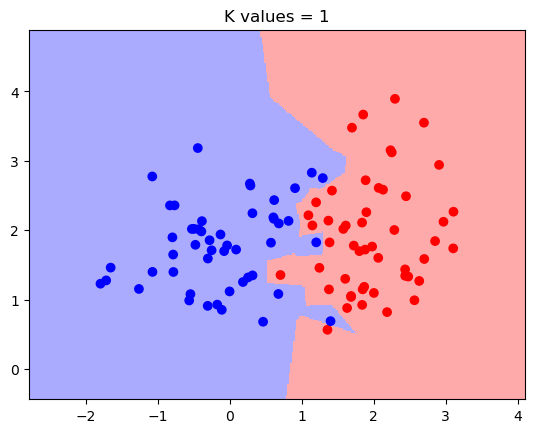

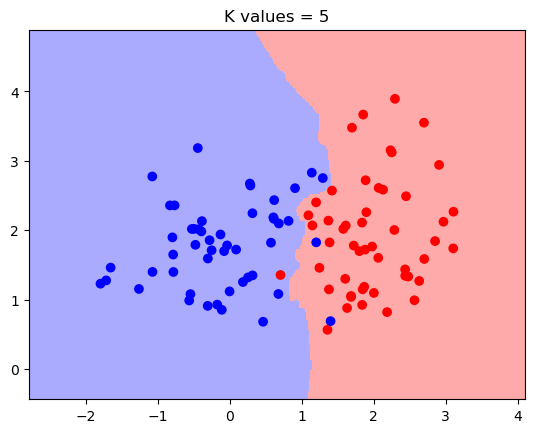

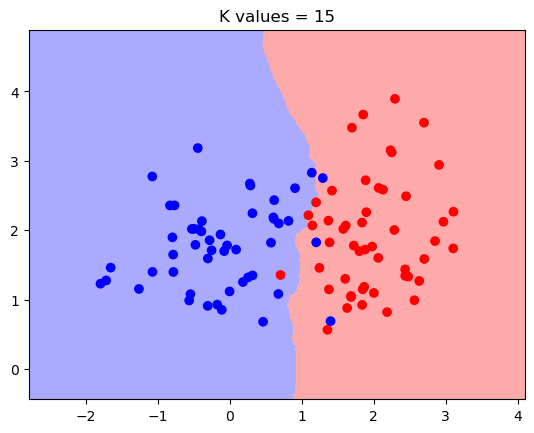

In [14]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/4.linearsep.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

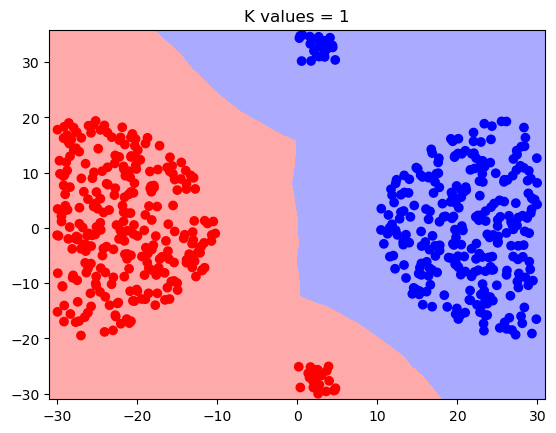

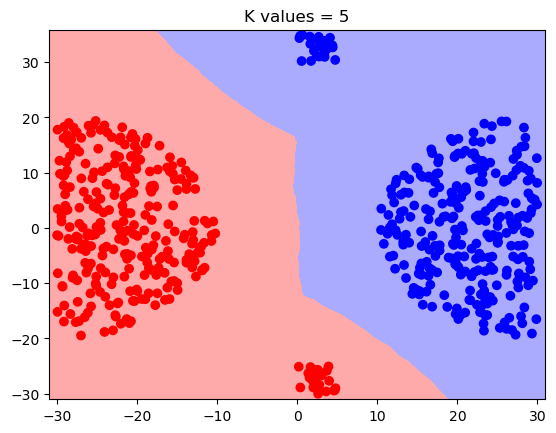

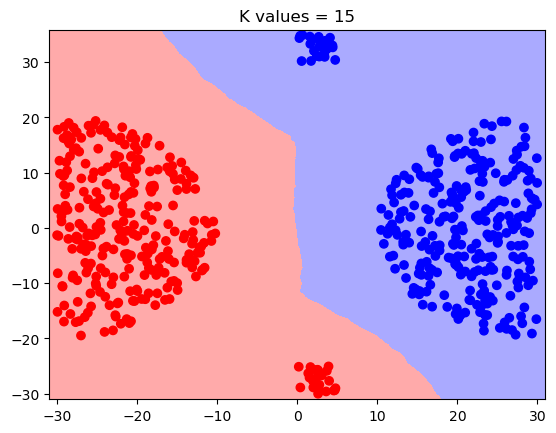

In [15]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/5.outlier.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

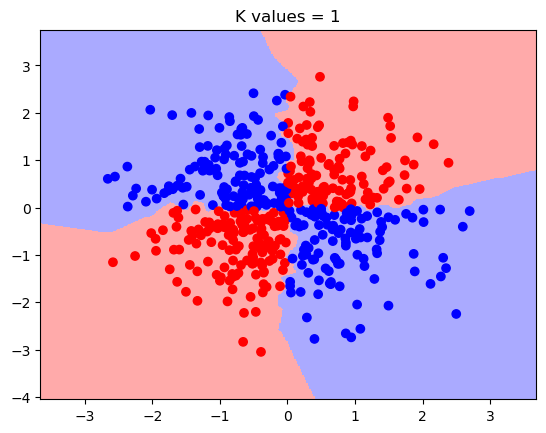

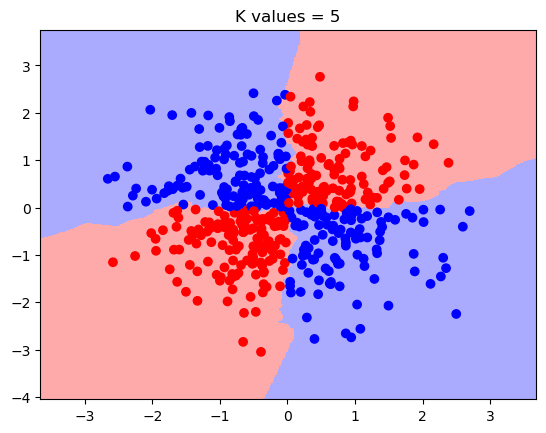

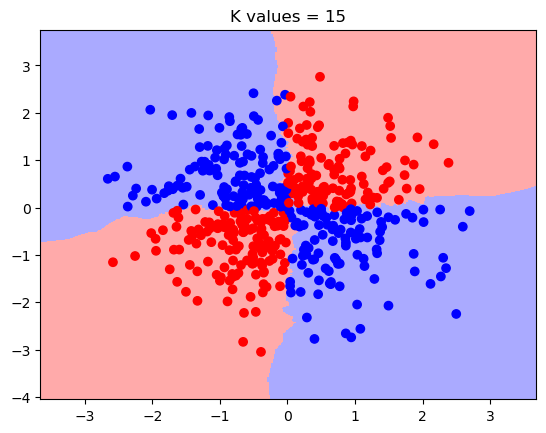

In [16]:
 data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/7.xor.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

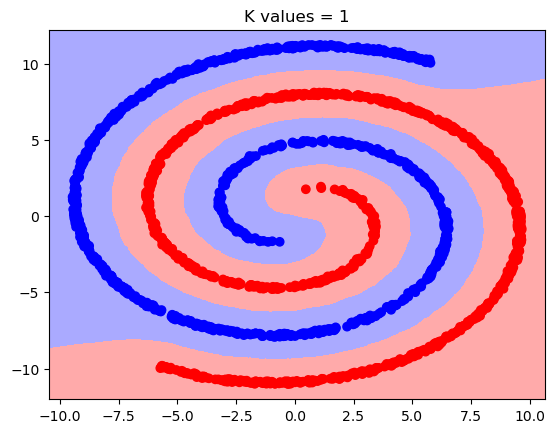

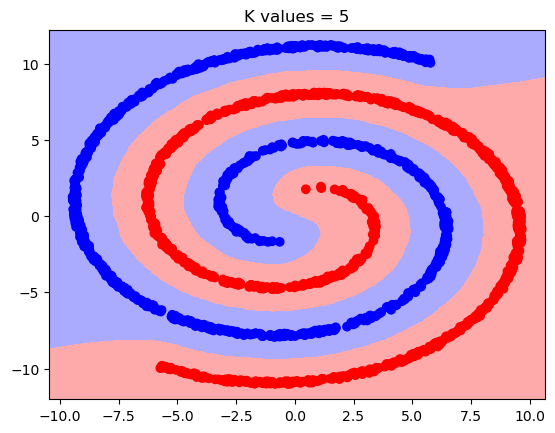

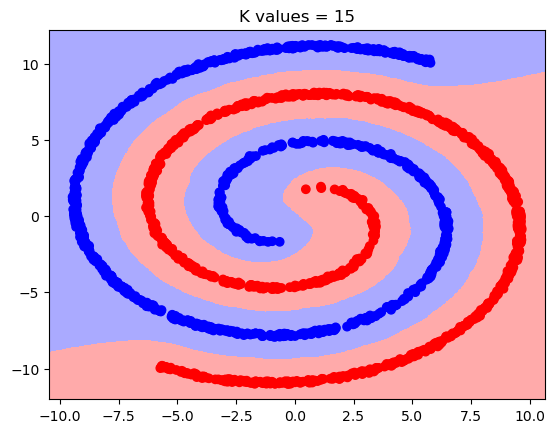

In [17]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/8.twospirals.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

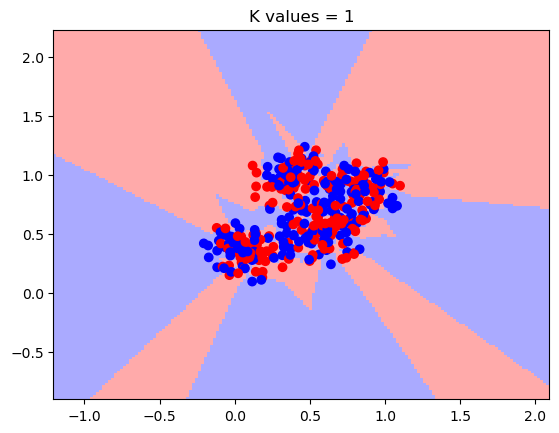

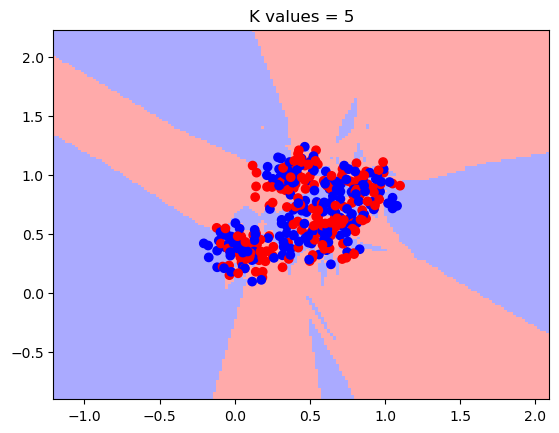

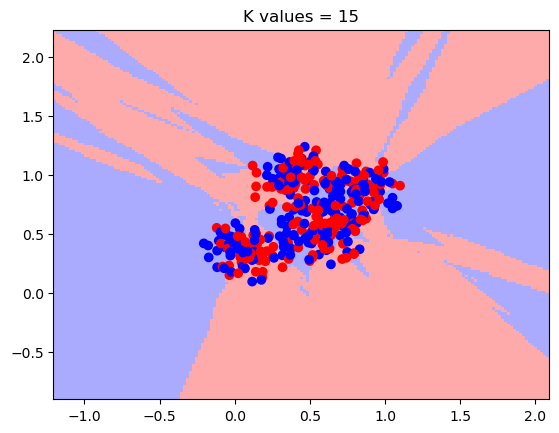

In [18]:
data = np.genfromtxt("C:/Users/Roshan Salunke/Downloads/Data Science Course/demo_data/9.random.csv", delimiter=',')

knn_comparison(data, 1)
knn_comparison(data, 5)
knn_comparison(data, 15)

In [105]:
dataset = pd.read_csv("C:/Users/Roshan Salunke/Downloads/Data Science Course/Social_Network_Ads.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [106]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [107]:
x  = dataset.iloc[:,[1,2,3]].values
y = dataset.iloc[:,-1].values

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [109]:
x[:5]

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000]], dtype=object)

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train_scale,y_train)

KNeighborsClassifier()

In [113]:
pred = knn.predict(x_test_scale)

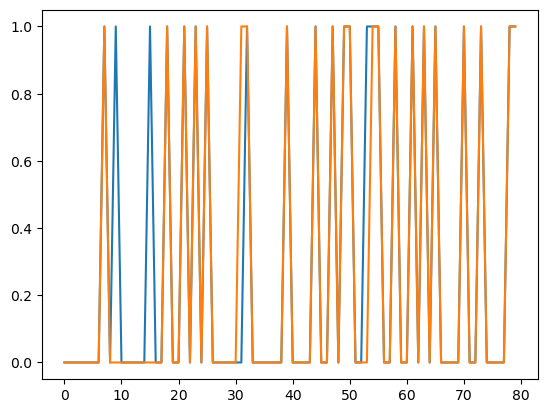

In [114]:
plt.plot(pred)
plt.plot(y_test)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test,pred))

[[55  3]
 [ 1 21]]
0.95


In [118]:
k_range = range(1,25)
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scale,y_train)
    pred = knn.predict(x_test_scale)
    scores.append(metrics.accuracy_score(y_test,pred))
print(scores)

[0.925, 0.925, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.925]


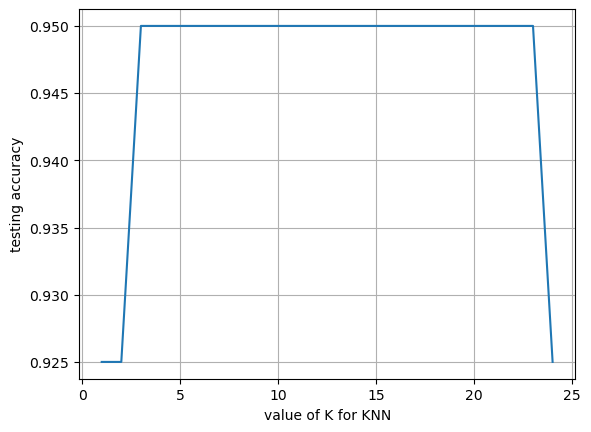

In [119]:
plt.plot(k_range, scores)
plt.xlabel('value of K for KNN')
plt.ylabel('testing accuracy')
plt.grid()
plt.show()